<center>
<h1> CREDIT CARD SPEND PREDICTION - Case Study

___

# **BUSINESS PROBLEM:**
- One of the global banks would like to understand what factors driving credit card spend are. The bank wants to use these insights to calculate credit limit. In order to solve the problem, the bank conducted survey of 5000 customers and collected data.<br>
<br>
- The objective of this case study is to understand what's driving the total spend (Primary Card + Secondary card).
- Given the factors, predict credit limit for the new applicants

### IMPORTING THE REQUIRED LIBRARIES

In [1225]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# parameters
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = False

# warnings
import warnings
warnings.filterwarnings('ignore')

### IMPORTING THE DATASET

In [1226]:
dataset = pd.read_excel('Data Set.xlsx')  # Data import

___

# DATA AUDIT

In [1227]:
dataset.head()  # Prints first five rows of the dataset

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [1228]:
dataset.tail()  # Prints last five rows of the dataset

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
4995,3675-GZFGOT-QJN,2,2.0,0,68,6,January,10,1,1,...,1,0,0,0,0,0,1,0,0,0
4996,4699-LEPCCE-3UD,3,3.0,0,51,5,May,14,2,1,...,1,0,0,0,0,0,0,0,0,0
4997,8485-LLUICH-CVV,4,5.0,0,75,6,August,17,4,1,...,1,1,0,0,0,0,1,0,0,0
4998,9325-URAAUT-7FA,1,1.0,0,47,4,December,19,4,2,...,1,0,1,1,1,0,1,0,0,0
4999,8027-EXDZBF-OGR,3,5.0,1,41,4,May,10,1,5,...,1,0,0,0,0,0,0,0,0,0


In [1229]:
dataset.shape  # Prints the shape of the dataset

(5000, 130)

In [1230]:
dataset.info(null_counts= True)  # Prints a small summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [1231]:
dataset.isnull().sum()  # Prints the number of missing values in the dataset

custid         0
region         0
townsize       2
gender         0
age            0
              ..
ownfax         0
news           0
response_01    0
response_02    0
response_03    0
Length: 130, dtype: int64

In [1232]:
#import pandas_profiling

#report = pandas_profiling.ProfileReport(dataset)
#report

In [1233]:
#report.to_file(output_file = 'profilereport.html')  # Exporting pandas profiling report

In [1234]:
# Since, the objective of this case study is to understand what's driving the total spend 
# Hence, total spend would be (Primary Card + Secondary card).
# so, I'll add 'cardspent' and 'card2spent' to on which I'll predict the total spend.

dataset['total_spend'] = dataset['cardspent'] + dataset['card2spent']

In [1235]:
# dropping variables based on high number of missing values
dataset = dataset.drop(columns = ['lnwireten', 'lnwiremon', 'lntollten', 'lntollmon', 'lnequipten', 'lnequipmon'])

In [1236]:
# Therefore, dropping 'cardspent' and 'card2spent' variables
dataset = dataset.drop(columns = ['cardspent', 'card2spent', 'custid'])

In [1237]:
# Creating Categorical List= Contains categorical variables...

for x in ['region','townsize','gender','agecat','edcat','birthmonth','jobcat','union','employ','empcat','retire',
          'inccat','default','jobsat','marital','spousedcat','homeown','hometype','address','addresscat','cars','carown',
          'cartype','carcatvalue','carbought','carbuy','commute','commutecat','commutecar',
          'commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk',
         'commutenonmotor','telecommute','reason','polview','polparty','polcontrib','vote','card','cardtype','cardbenefit',
         'cardfee','cardtenure','cardtenurecat','card2','card2type','card2benefit','card2fee','card2tenure','card2tenurecat',
         'active','bfast','churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid',
         'callwait','forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax',
        'news','response_01','response_02','response_03']:
        dataset[x]=dataset[x].astype('object')
    

In [1238]:
# splitting continous and categorical valriables to perform some specific functions on them.
# and so have to better clarity of the data

dataset_conti_vars = dataset.loc[:, (dataset.dtypes == 'float64') | (dataset.dtypes == 'int64') | (dataset.dtypes == 'float32') | (dataset.dtypes == 'int32')]
dataset_cat_vars = dataset.loc[:, dataset.dtypes == 'object']

In [1239]:
dataset_conti_vars.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,equipmon,equipten,cardmon,lncardmon,cardten,lncardten,wiremon,wireten,hourstv,total_spend
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,...,29.50,126.1,14.25,2.656757,60.0,4.094345,0.00,0.00,13,149.46
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,...,54.85,1975.0,16.00,2.772589,610.0,6.413459,45.65,1683.55,18,77.54
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,...,0.00,0.0,23.00,3.135494,1410.0,7.251345,0.00,0.00,21,359.97
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,...,0.00,0.0,21.00,3.044522,685.0,6.529419,0.00,0.00,26,359.41
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,...,0.00,0.0,17.25,2.847812,360.0,5.886104,19.05,410.80,27,507.83


In [1240]:
dataset_cat_vars.head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2,1,2,September,3,1,1,0,1,...,0,0,0,1,1,0,0,0,1,0
1,5,5,0,2,May,4,2,0,0,1,...,1,1,1,1,1,1,1,0,0,0
2,3,4,1,6,June,2,2,0,16,5,...,1,0,0,0,0,0,1,0,0,0
3,4,3,0,2,May,3,2,0,0,1,...,1,0,1,1,1,0,1,1,0,0
4,2,2,0,3,July,3,2,0,1,1,...,1,0,1,0,1,0,0,0,1,0


In [1241]:
# creating a UDF to get the summary of the continous variables for better understanding

def continous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.min(), x.mean(), x.median(), x.std(), x.var(), 
                      x.quantile(.01), x.quantile(.05), x.quantile(.10), x.quantile(.25), x.quantile(.50), 
                      x.quantile(.75), x.quantile(.90), x.quantile(.95), x.quantile(.99), x.max()], 
                      index = ['N', 'NMISS', 'SUM', 'MIN', 'MEAN', 'MEDIAN', 'STD', 'VAR', 'P1', 'P5', 'P10', 
                               'P25', 'P50', 'P75', 'P90', 'P95', 'P99', 'MAX'] )

In [1242]:
dataset_conti_vars.apply(continous_var_summary).T.round(2)  # A brief summary of the continous variables

,N,NMISS,SUM,MIN,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,235128.00,18.00,47.03,47.00,17.77,315.78,18.00,20.00,23.00,31.00,47.00,62.00,72.00,76.00,79.00,79.00
ed,5000.0,0.0,72715.00,6.00,14.54,14.00,3.28,10.77,8.00,9.00,10.00,12.00,14.00,17.00,19.00,20.00,21.00,23.00
income,5000.0,0.0,273798.00,9.00,54.76,38.00,55.38,3066.67,9.00,13.00,16.00,24.00,38.00,67.00,109.10,147.00,272.01,1073.00
lninc,5000.0,0.0,18499.55,2.20,3.70,3.64,0.75,0.56,2.20,2.56,2.77,3.18,3.64,4.20,4.69,4.99,5.61,6.98
debtinc,5000.0,0.0,49770.80,0.00,9.95,8.80,6.40,40.96,0.70,1.90,2.80,5.10,8.80,13.60,18.60,22.20,29.20,43.10
creddebt,5000.0,0.0,9286.63,0.00,1.86,0.93,3.42,11.67,0.03,0.10,0.18,0.39,0.93,2.06,4.30,6.37,14.28,109.07
lncreddebt,4999.0,1.0,-652.14,-6.60,-0.13,-0.08,1.27,1.62,-3.40,-2.29,-1.74,-0.95,-0.08,0.72,1.46,1.85,2.66,4.69
othdebt,5000.0,0.0,18272.30,0.00,3.65,2.10,5.40,29.11,0.11,0.29,0.46,0.98,2.10,4.31,8.06,11.82,24.06,141.46
lnothdebt,4999.0,1.0,3483.88,-4.09,0.70,0.74,1.13,1.27,-2.17,-1.24,-0.78,-0.02,0.74,1.46,2.09,2.47,3.18,4.95
spoused,5000.0,0.0,30564.00,-1.00,6.11,-1.00,7.74,59.96,-1.00,-1.00,-1.00,-1.00,-1.00,14.00,16.00,18.00,20.00,24.00


In [1243]:
# creating a UDF for the summary of categorical varibles for better understanding of the data

def categorical_var_summary(x):
    Mode = x.value_counts().reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1],
                      round(((Mode.iloc[0, 1] * 100) / x.count()), 2)], 
                     index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERC'])

In [1244]:
dataset_cat_vars.apply(categorical_var_summary).T  # A brief summary of the categorical variables

,N,NMISS,MODE,FREQ,PERC
region,5000,0,5,1027,20.54
townsize,4998,2,1,1436,28.73
gender,5000,0,1,2518,50.36
agecat,5000,0,4,1222,24.44
birthmonth,5000,0,September,458,9.16
...,...,...,...,...,...
ownfax,5000,0,0,4106,82.12
news,5000,0,0,2637,52.74
response_01,5000,0,0,4582,91.64
response_02,5000,0,0,4351,87.02


# DATA PREPERATION

### OUTLIERS TREATMENT

In [1245]:
# Clipping outliers with P1 and P99
#dataset_conti_vars = dataset_conti_vars.apply(lambda x: x.clip(lower = x.dropna().quantile(.01), upper = x.quantile(.99)))


In [1246]:
#dataset_conti_vars.apply(continous_var_summary).T.round(2)  # A brief summary of the continous variables

### MISSING IMPUTATION

In [1247]:
# Creating a UDF to treat missing values

def missing_imputation(x, stats = 'mean'):
    if (x.dtype == 'float64') | (x.dtype == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x.fillna(x.mode())
    return x

In [1248]:
# Imputing missing values
# Continous values with the mean and categorical values with the mode 

dataset_conti_vars = dataset_conti_vars.apply(missing_imputation)
dataset_cat_vars = dataset_cat_vars.apply(missing_imputation)

In [1249]:
dataset_conti_vars.apply(continous_var_summary).T.round(2) # Hence, we imputed all the missing values

,N,NMISS,SUM,MIN,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,235128.00,18.00,47.03,47.00,17.77,315.78,18.00,20.00,23.00,31.00,47.00,62.00,72.00,76.00,79.00,79.00
ed,5000.0,0.0,72715.00,6.00,14.54,14.00,3.28,10.77,8.00,9.00,10.00,12.00,14.00,17.00,19.00,20.00,21.00,23.00
income,5000.0,0.0,273798.00,9.00,54.76,38.00,55.38,3066.67,9.00,13.00,16.00,24.00,38.00,67.00,109.10,147.00,272.01,1073.00
lninc,5000.0,0.0,18499.55,2.20,3.70,3.64,0.75,0.56,2.20,2.56,2.77,3.18,3.64,4.20,4.69,4.99,5.61,6.98
debtinc,5000.0,0.0,49770.80,0.00,9.95,8.80,6.40,40.96,0.70,1.90,2.80,5.10,8.80,13.60,18.60,22.20,29.20,43.10
creddebt,5000.0,0.0,9286.63,0.00,1.86,0.93,3.42,11.67,0.03,0.10,0.18,0.39,0.93,2.06,4.30,6.37,14.28,109.07
lncreddebt,5000.0,0.0,-652.27,-6.60,-0.13,-0.08,1.27,1.62,-3.40,-2.29,-1.74,-0.95,-0.08,0.72,1.46,1.85,2.66,4.69
othdebt,5000.0,0.0,18272.30,0.00,3.65,2.10,5.40,29.11,0.11,0.29,0.46,0.98,2.10,4.31,8.06,11.82,24.06,141.46
lnothdebt,5000.0,0.0,3484.58,-4.09,0.70,0.74,1.13,1.27,-2.17,-1.24,-0.78,-0.02,0.74,1.46,2.09,2.47,3.18,4.95
spoused,5000.0,0.0,30564.00,-1.00,6.11,-1.00,7.74,59.96,-1.00,-1.00,-1.00,-1.00,-1.00,14.00,16.00,18.00,20.00,24.00


## DUMMY VARIABLES

In [1250]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True)
    return df

In [1251]:
for c_feature in dataset_cat_vars:
    dataset_cat_vars[c_feature] = dataset_cat_vars[c_feature].astype('category')
    dataset_cat_vars = create_dummies(dataset_cat_vars, c_feature)

In [1252]:
dataset_cat_vars

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,...,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,...,1,1,1,1,1,1,1,0,0,0
2,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,1,0,1,1,1,0,1,1,0,0
4,1,0,0,0,1,0,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4996,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4997,0,0,1,0,0,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,0,1,0,0,0


In [1253]:
# concatinating both the tables to get one final consolidated table

df_final = pd.concat([dataset_conti_vars, dataset_cat_vars], axis = 1)

In [1254]:
df_final.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,...,0,0,0,1,1,0,0,0,1,0
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,...,1,1,1,1,1,1,1,0,0,0
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,...,1,0,0,0,0,0,1,0,0,0
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,...,1,0,1,1,1,0,1,1,0,0
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,...,1,0,1,0,1,0,0,0,1,0


In [1255]:
for col in df_final:
    df_final[col] = df_final[col].astype(int)

___

# ASSUMPTIONS CHECK

#### Y SHOULD BE NORMAL

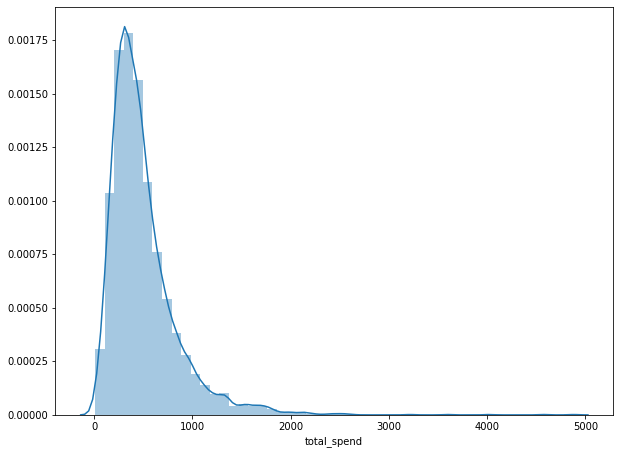

In [1256]:
# To check whether Y normal or not we can plot a distance plot which gives me a histogram with a line.

sns.distplot(df_final.total_spend)

In [1257]:
# Here i can clearly see that my Y variable i.e. dependent variable is not normally distributed.
# to make it normal i will take log of this

df_final['ln_total_spend'] = np.log10(df_final.total_spend)

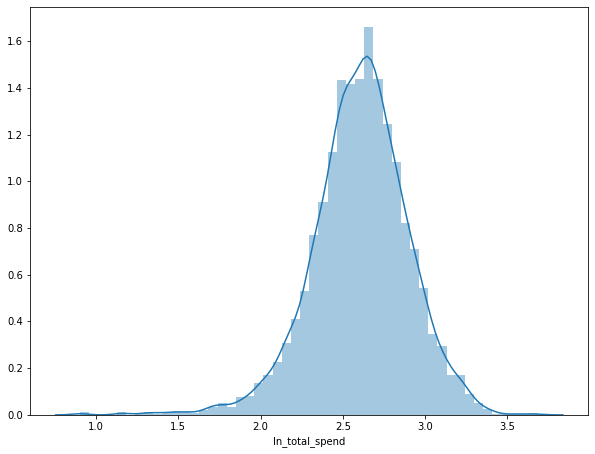

In [1258]:
sns.distplot(df_final.ln_total_spend)

<center> <h3> Now y variable is normally distributed. Hence I can proceed further now

#### THERE SHOULD NOT BE ANY MISSING VALUES

In [1259]:
df_final.ln_total_spend.isna().sum()

# There are no missing values in the y variable now

0

#### THERE MUST BE A RELATION BETWEEN X AND Y

In [1260]:
corrm = df_final.corr()  # correlation matrix

In [1261]:
corrm

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,ln_total_spend
age,1.000000,-0.094560,0.189301,0.152547,0.039011,0.120238,0.101405,0.137644,0.135691,-0.002892,...,-0.074423,-0.133284,-0.217524,-0.235226,-0.042090,0.365204,0.015140,0.013175,-0.026231,0.002228
ed,-0.094560,1.000000,0.178036,0.196379,0.011707,0.103327,0.119321,0.126660,0.141108,0.117563,...,0.299871,0.435034,0.369256,0.376235,0.276750,-0.073644,-0.117606,0.073207,0.107171,0.097471
income,0.189301,0.178036,1.000000,0.775548,0.017972,0.663121,0.473916,0.732106,0.568973,0.038089,...,0.139004,0.048604,0.037423,0.031165,0.145425,0.121696,-0.007106,0.053693,0.047225,0.327850
lninc,0.152547,0.196379,0.775548,1.000000,0.016651,0.441931,0.488435,0.534184,0.591058,0.046128,...,0.142765,0.061400,0.059431,0.056130,0.137567,0.104358,-0.005363,0.053048,0.060391,0.383800
debtinc,0.039011,0.011707,0.017972,0.016651,1.000000,0.355437,0.495839,0.450768,0.575600,-0.038570,...,0.001908,0.010001,0.014406,0.009038,0.003458,0.004070,0.004551,0.002407,0.019810,0.017070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
news_1,0.365204,-0.073644,0.121696,0.104358,0.004070,0.073851,0.040467,0.089365,0.081898,0.090618,...,-0.037949,-0.061753,-0.099716,-0.089811,-0.024573,1.000000,0.020919,0.030136,-0.011148,0.027441
response_01_1,0.015140,-0.117606,-0.007106,-0.005363,0.004551,-0.000578,-0.010634,0.000239,-0.000842,-0.008600,...,-0.023472,-0.107194,-0.069870,-0.096176,-0.014592,0.020919,1.000000,-0.015601,-0.018781,-0.010284
response_02_1,0.013175,0.073207,0.053693,0.053048,0.002407,0.027808,0.029872,0.034980,0.046207,0.032034,...,0.021608,0.039891,0.015485,0.011744,0.032549,0.030136,-0.015601,1.000000,0.028266,0.024825
response_03_1,-0.026231,0.107171,0.047225,0.060391,0.019810,0.025602,0.048556,0.039134,0.044559,0.002480,...,0.077116,0.089388,0.072791,0.094278,0.093360,-0.011148,-0.018781,0.028266,1.000000,0.061550


In [1262]:
# Finding correlation between X variables and Y variable

corr_cols = corrm[(corrm.ln_total_spend < 0.01) & (corrm.ln_total_spend > -0.01)].T.columns
corr_cols

Index(['age', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_small',
       'pets_saltfish', 'pets_freshfish', 'commutetime', 'region_2',
       ...
       'card2tenure_18', 'card2tenure_21', 'card2tenure_22', 'card2tenure_24',
       'card2tenure_27', 'card2tenure_29', 'card2tenure_30',
       'card2tenurecat_3', 'active_1', 'internet_2'],
      dtype='object', length=146)

In [1263]:
# Dropping some X variables based on low correlation with y

df_final = df_final.drop(columns = corr_cols)

In [1264]:
corrm_final = df_final.corr()
corrm_final

,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,pets_birds,...,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,ln_total_spend
ed,1.000000,0.178036,0.196379,0.011707,0.103327,0.119321,0.126660,0.141108,0.117563,0.008051,...,0.299871,0.435034,0.369256,0.376235,0.276750,-0.073644,-0.117606,0.073207,0.107171,0.097471
income,0.178036,1.000000,0.775548,0.017972,0.663121,0.473916,0.732106,0.568973,0.038089,-0.002780,...,0.139004,0.048604,0.037423,0.031165,0.145425,0.121696,-0.007106,0.053693,0.047225,0.327850
lninc,0.196379,0.775548,1.000000,0.016651,0.441931,0.488435,0.534184,0.591058,0.046128,0.010880,...,0.142765,0.061400,0.059431,0.056130,0.137567,0.104358,-0.005363,0.053048,0.060391,0.383800
debtinc,0.011707,0.017972,0.016651,1.000000,0.355437,0.495839,0.450768,0.575600,-0.038570,-0.012528,...,0.001908,0.010001,0.014406,0.009038,0.003458,0.004070,0.004551,0.002407,0.019810,0.017070
creddebt,0.103327,0.663121,0.441931,0.355437,1.000000,0.581261,0.663747,0.461100,0.011072,-0.012274,...,0.056343,0.021195,0.012246,-0.005413,0.070882,0.073851,-0.000578,0.027808,0.025602,0.198680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
news_1,-0.073644,0.121696,0.104358,0.004070,0.073851,0.040467,0.089365,0.081898,0.090618,-0.024218,...,-0.037949,-0.061753,-0.099716,-0.089811,-0.024573,1.000000,0.020919,0.030136,-0.011148,0.027441
response_01_1,-0.117606,-0.007106,-0.005363,0.004551,-0.000578,-0.010634,0.000239,-0.000842,-0.008600,-0.017761,...,-0.023472,-0.107194,-0.069870,-0.096176,-0.014592,0.020919,1.000000,-0.015601,-0.018781,-0.010284
response_02_1,0.073207,0.053693,0.053048,0.002407,0.027808,0.029872,0.034980,0.046207,0.032034,-0.003191,...,0.021608,0.039891,0.015485,0.011744,0.032549,0.030136,-0.015601,1.000000,0.028266,0.024825
response_03_1,0.107171,0.047225,0.060391,0.019810,0.025602,0.048556,0.039134,0.044559,0.002480,0.008489,...,0.077116,0.089388,0.072791,0.094278,0.093360,-0.011148,-0.018781,0.028266,1.000000,0.061550


In [1265]:
# Another method to find correlation

sol = corrm_final.unstack().sort_values().drop_duplicates().reset_index()
sol.loc[(sol[0] > 0.5) | (sol[0] < -0.5)]['level_0'].unique()

array(['cartype_1', 'carown_0', 'hometype_2', 'lninc', 'carcatvalue_1',
       'reason_9', 'tenure', 'bfast_3', 'hourstv', 'pager_1',
       'cardtenure_3', 'ed', 'equipmon', 'ownpda_1', 'wireten', 'news_1',
       'agecat_3', 'tollten', 'inccat_3', 'wireless_1', 'lnlongmon',
       'longmon', 'carvalue', 'ownfax_1', 'equipten', 'lnothdebt',
       'ebill_1', 'cardten', 'lnlongten', 'longten', 'inccat_5',
       'card2tenurecat_5', 'creddebt', 'tollmon', 'lncreddebt', 'wiremon',
       'callid_1', 'confer_1', 'callwait_1', 'carcatvalue_3',
       'tollfree_1', 'lncardten', 'voice_1', 'cardmon', 'retire_1',
       'income', 'othdebt', 'card2tenurecat_2', 'card2tenure_1',
       'commutecat_3', 'ln_total_spend', 'spoused', 'response_03_1'],
      dtype=object)

In [1266]:
# Dropping some X variables based on low correlation with y

df_final = df_final.drop(columns = ['cartype_0', 'carown_0', 'hometype_2', 'carcatvalue_1',
                                       'carcatvalue_2', 'reason_9', 'bfast_3',
                                       'hourstv', 'lnlongten', 'pager_1', 'cardtenurecat_2', 'edcat_5',
                                       'equipmon', 'ownpda_1', 'wireten', 'lnlongmon', 'addresscat_2',
                                       'wiremon', 'tollten', 'wireless_1', 'longmon',
                                       'inccat_5', 'othdebt', 'lninc', 'carvalue', 'ed',
                                       'equip_1', 'cardtenurecat_5', 'longten', 'lncardten',
                                       'lnothdebt', 'carcatvalue_3', 'lncreddebt',
                                       'forward_1', 'ownfax_1', 'tollmon', 'voice_1', 'cardten',
                                       'callwait_1', 'news_1', 'confer_1', 'tollfree_1',
                                       'equipten', 'callcard_1', 'card2tenurecat_5', 'retire_1',
                                       'creddebt', 'card2tenure_1', 'commute_4', 'cardmon',
                                       'spoused', 'response_03_1'])

In [1267]:
df_final.shape  # prints the shape after dropping variables based on low correlation with y

(5000, 197)

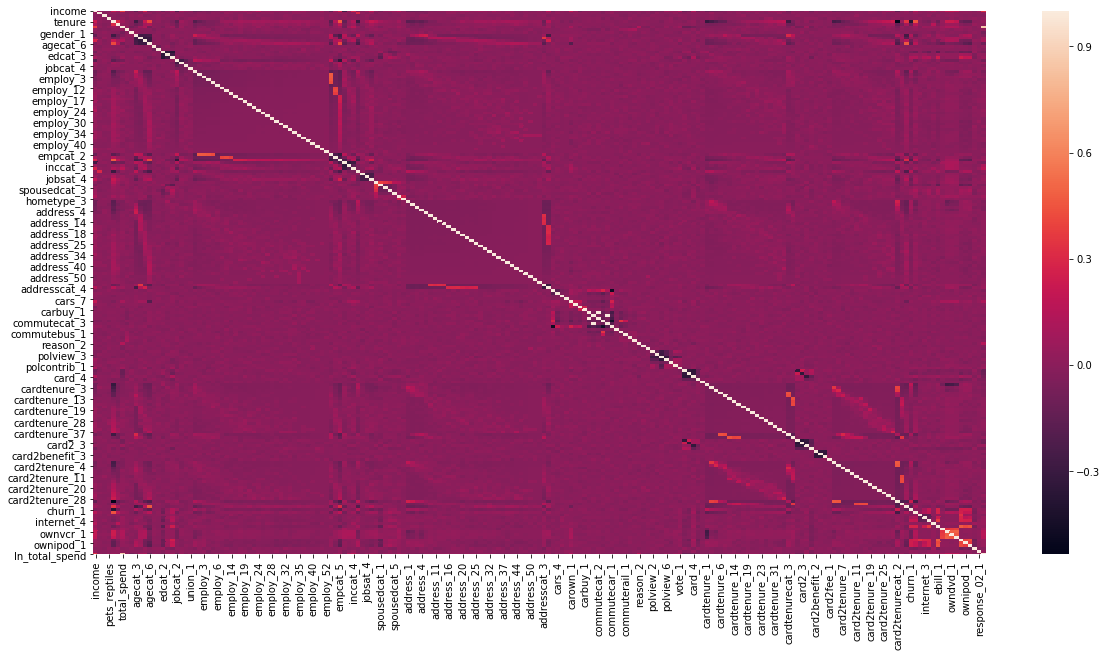

In [1268]:
plt.figure(figsize = (20, 10))

sns.heatmap(df_final.corr())  # plotting heatmap

# MODEL BUILDING

### LINEAR REGRESSION : OLS TECHNIQUE

In [1269]:
# deleting variables based on high p values

df_final = df_final.drop(columns = ['vote_1', 'response_01_1', 'polview_4', 'polview_3', 'polview_2', 'owntv_1', 
                                     'ownpc_1', 'owngame_1', 'marital_1', 'jobsat_5', 'jobsat_4',
                                     'jobcat_2', 'internet_1', 'homeown_1', 'employ_40', 'employ_4', 'employ_36',
                                     'employ_35', 'employ_33', 'employ_33', 'employ_31', 'employ_30', 'employ_3',
                                     'employ_23', 'employ_21', 'employ_19', 'employ_12', 'empcat_5', 'empcat_4', 
                                     'empcat_2', 'edcat_4', 'edcat_2', 'commutemotorcycle_1', 'commutecat_3', 
                                     'commutebus_1', 'cars_7', 'cars_6', 'cars_4', 'cardtenurecat_4', 'cardtenure_7', 
                                     'cardtenure_6', 'cardtenure_4', 'cardtenure_37', 'cardtenure_3', 'cardtenure_22',
                                     'cardtenure_18', 'cardtenure_15', 'cardtenure_14', 'cardtenure_13', 'cardtenure_1',
                                     'cardbenefit_3', 'card2tenure_7', 'card2tenure_25', 'card2fee_1', 'card2benefit_4', 
                                     'card2benefit_2', 'carbuy_1', 'carbought_0', 'callid_1', 'birthmonth_December', 
                                     'agecat_6', 'agecat_5', 'agecat_4', 'agecat_3', 'address_6', 'address_45', 'address_40',
                                     'address_34', 'address_28', 'address_25', 'address_23', 'address_20', 'address_2', 
                                     'address_18', 'address_17', 'address_16'])

In [1270]:

# deleting variables based on high p values

df_final = df_final.drop(columns = ['spousedcat_3', 'response_02_1', 'reason_3', 'polview_6', 'polcontrib_1',
                                     'pets_reptiles', 'pets_birds', 'employ_52', 'employ_5', 'employ_45', 'employ_39',
                                     'employ_34', 'employ_24', 'employ_1', 'edcat_3', 'commutenonmotor_1', 
                                     'cardtenure_29', 'cardtenure_28', 'card2tenurecat_4', 'card2tenurecat_2', 
                                     'card2tenure_13', 'addresscat_4', 'addresscat_3', 'address_50', 'address_4', 
                                     'address_37', 'address_36', 'address_3'])

In [1271]:
# deleting variables based on high p values

df_final = df_final.drop(columns = ['address_1', 'address_10', 'address_15', 'address_22', 'address_47', 
                                     'address_55', 'card2tenure_11', 'card2tenure_3', 'cardtenure_21', 
                                     'cardtenure_31', 'cardtenure_34', 'cartype_1', 'churn_1', 'commute_10',
                                     'commutebike_1', 'commutecat_5', 'employ_16', 'employ_17', 'employ_2',
                                     'employ_28', 'hometype_3', 'jobcat_4', 'multline_1', 'region_5', 'spousedcat_1',
                                     'tenure'])

In [1272]:
# deleting variables based on high p values

df_final = df_final.drop(columns = ['union_1', 'spousedcat_4', 'owndvd_1', 'jobcat_3', 'employ_14',
                                     'employ_13', 'debtinc', 'commuterail_1', 'commutecat_2', 'commutecar_1',
                                     'commute_3', 'cardtenurecat_3', 'cardtenure_19', 'card2tenure_28', 
                                     'card2tenure_23', 'card2tenure_15', 'card2tenure_10', 'card2tenure_15', 
                                     'address_53', 'address_27', 'address_14', 'address_11'])

In [1273]:
# deleting variables based on high p values

df_final = df_final.drop(columns = ['card2tenure_19', 'card2tenure_20', 'card2tenure_8', 'employ_26', 'ownipod_1', 
                                    'address_39', 'address_44', 'card2tenure_26', 'cardtenure_23', 'cars_1', 
                                     'default_1', 'ebill_1', 'employ_32', 'spousedcat_5', 'lncardmon', 
                                    'employ_25', 'employ_6', 'internet_3', 'internet_4', 'jobsat_3', 'polview_7'])

In [1274]:
from sklearn.model_selection import train_test_split 

train, test = train_test_split(df_final, test_size = 0.30, random_state = 42)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [1275]:
feature_cols = df_final.columns.difference(['ln_total_spend', 'total_spend'])

In [1276]:
# feature selection

my_formula = "ln_total_spend ~" + "+".join(df_final.columns.difference(['ln_total_spend', 'total_spend']))

In [1277]:
# Model building

import statsmodels.formula.api as smf

lm1 = smf.ols(formula = my_formula, data = train).fit()

In [1278]:
lm1.summary()  # prints summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ln_total_spend   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     69.65
Date:                Sun, 23 Feb 2020   Prob (F-statistic):          2.17e-274
Time:                        00:34:35   Log-Likelihood:              0.0014997
No. Observations:                3500   AIC:                             50.00
Df Residuals:                    3475   BIC:                             204.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.7785      0.024    117.280      0.000       2.732       2.825
address_32              0.0857      0.034      2.527      0.012       0.019       0.152
bfast_2                -0.0335      0.009     -3.699      0.000      -0.051      -0.016
birthmonth_February    -0.0323      0.015     -2.158      0.031      -0.062      -0.003
card2_2                -0.1811      0.013    -13.504      0.000      -0.207      -0.155
card2_3                -0.1782      0.013    -13.361      0.000      -0.204      -0.152
card2_4                -0.2006      0.015    -13.705      0.000      -0.229      -0.172
card2_5                -0.1286      0.019     -6.684      0.000      -0.166      -0.091
card2benefit_3         -0.0249      0.009     -2.666      0.008      -0.043      -0.007
card2tenure_4          -0.0549      0.019     -2.859      0.004      -0.093      -0.017
card_2                 -0.2666      0.013    -20.218      0.000      -0.292      -0.241
card_3                 -0.2704      0.013    -20.080      0.000      -0.297      -0.244
card_4                 -0.3139      0.014    -22.812      0.000      -0.341      -0.287
card_5                 -0.2186      0.022     -9.910      0.000      -0.262      -0.175
carown_1                0.0278      0.010      2.825      0.005       0.008       0.047
employ_43              -0.2647      0.122     -2.171      0.030      -0.504      -0.026
gender_1               -0.0228      0.008     -2.744      0.006      -0.039      -0.006
inccat_2                0.0470      0.011      4.356      0.000       0.026       0.068
inccat_3                0.0973      0.013      7.549      0.000       0.072       0.123
inccat_4                0.1069      0.014      7.546      0.000       0.079       0.135
income                  0.0014    8.4e-05     16.572      0.000       0.001       0.002
owncd_1                 0.0520      0.019      2.733      0.006       0.015       0.089
ownvcr_1                0.0403      0.017      2.321      0.020       0.006       0.074
reason_2                0.1047      0.016      6.384      0.000       0.073       0.137
reason_4               -0.0696      0.029     -2.432      0.015      -0.126      -0.013
==============================================================================
Omnibus:                      401.440   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              941.119
Skew:                          -0.676   Prob(JB):                    4.35e-205
Kurtosis:                       5.151   Cond. No.                     2.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+0

In [1279]:
# here we predict the values on training and testing dataset

train['y_pred'] = lm1.predict(train)
test['y_pred_test'] = lm1.predict(test)

In [1280]:
# Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). 
# Residuals are a measure of how far from the regression line data points are; 
# RMSE is a measure of how spread out these residuals are. 
# In other words, it tells you how concentrated the data is around the line of best fit.

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

RMSE_train = np.sqrt(mean_squared_error(train.ln_total_spend, train.y_pred))
print('RMSE_train:', RMSE_train)

RMSE_test = np.sqrt(mean_squared_error(test.ln_total_spend, test.y_pred_test))
print('\nRMSE_test:', RMSE_test)

RMSE_train: 0.24197062083933207

RMSE_test: 0.24022908743993032


In [1281]:
# The mean absolute percentage error is a measure of prediction accuracy of a forecasting method in statistics.

MAPE_train = np.mean(abs(train.ln_total_spend - train.y_pred)*100 / train.ln_total_spend)
print('MAPE_train:', MAPE_train)

MAPE_test = np.mean(abs(test.ln_total_spend - test.y_pred_test)*100 / test.ln_total_spend)
print('\nMAPE_test:', MAPE_test)

MAPE_train: 7.530912941146524

MAPE_test: 7.541818724657639


In [1282]:
# VIF : Variation Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices(my_formula,  train, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [1283]:
vif.round(1).sort_values('VIF Factor', ascending = False)

,VIF Factor,features
0,33.3,Intercept
6,2.3,card2_4
12,2.2,card_4
5,2.1,card2_3
4,2.0,card2_2
10,1.9,card_2
11,1.9,card_3
17,1.6,inccat_2
22,1.5,ownvcr_1
18,1.4,inccat_3


### DECILES ANALYSIS

In [1284]:
train['Deciles'] = pd.qcut(train.y_pred, 10, labels = False)
test['Deciles'] = pd.qcut(test.y_pred_test, 10, labels = False)

In [1285]:
Predicted_avg = train.groupby(['Deciles'])['Deciles', 'y_pred'].mean().sort_index(ascending = False)['y_pred']
Actual_avg = train.groupby(['Deciles'])['Deciles', 'ln_total_spend'].mean().sort_index(ascending = False)['ln_total_spend']
Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

Predicted_avg = test.groupby(['Deciles'])['Deciles', 'y_pred_test'].mean().sort_index(ascending = False)['y_pred_test']
Actual_avg = test.groupby(['Deciles'])['Deciles', 'ln_total_spend'].mean().sort_index(ascending = False)['ln_total_spend']
Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

In [1286]:
Decile_analysis_train

,Deciles,y_pred,ln_total_spend
0,9,2.921009,2.908709
1,8,2.791811,2.799601
2,7,2.718912,2.720875
3,6,2.655447,2.658214
4,5,2.606503,2.627095
5,4,2.560126,2.556578
6,3,2.518007,2.547693
7,2,2.480968,2.472408
8,1,2.436089,2.433367
9,0,2.355608,2.319938


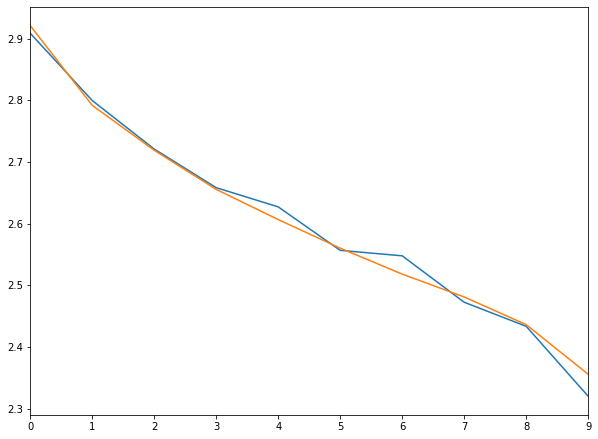

In [1287]:
Decile_analysis_train['ln_total_spend'].plot()
Decile_analysis_train['y_pred'].plot()

In [1288]:
Decile_analysis_test

,Deciles,y_pred_test,ln_total_spend
0,9,2.920081,2.916848
1,8,2.789278,2.765126
2,7,2.716462,2.708529
3,6,2.653186,2.691976
4,5,2.604893,2.585549
5,4,2.558805,2.575289
6,3,2.514061,2.525718
7,2,2.473798,2.494064
8,1,2.433788,2.468516
9,0,2.366327,2.351407


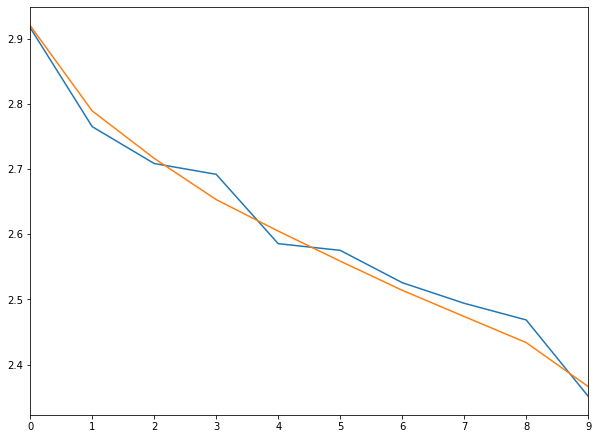

In [1289]:
Decile_analysis_test['ln_total_spend'].plot()
Decile_analysis_test['y_pred_test'].plot()

In [1290]:
# The predicted sales deciles in the training and testing dataset are in order.
# Hence, we can say that our model in good.

In [1291]:
lm1.resid  # residuals

1840   -0.072453
2115    0.301258
4437    0.134335
1146   -0.212666
2486   -0.163491
          ...   
4426   -0.071970
466    -0.105065
3092    0.129413
3772   -0.011487
860    -0.226401
Length: 3500, dtype: float64

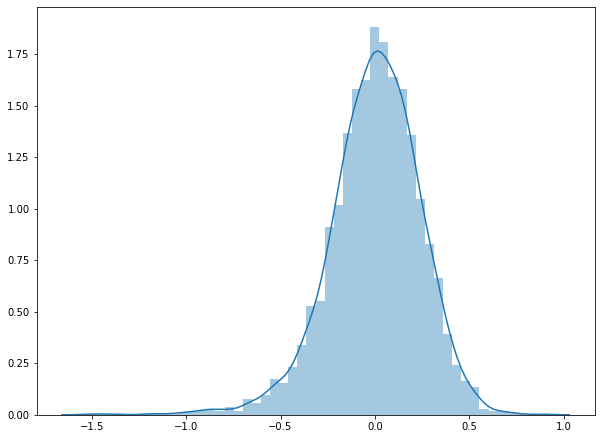

In [1292]:
sns.distplot(lm1.resid)  # plotting residuals

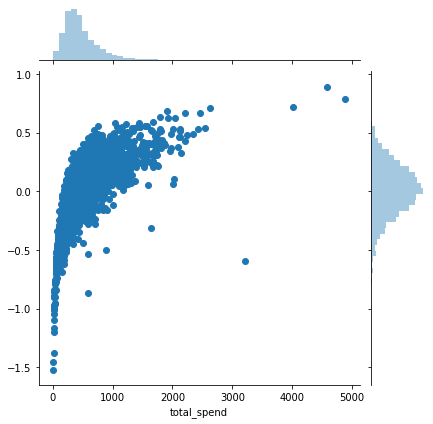

In [1293]:
sns.jointplot(train.total_spend, lm1.resid)  # ASSUMPTION: Error chart should be random

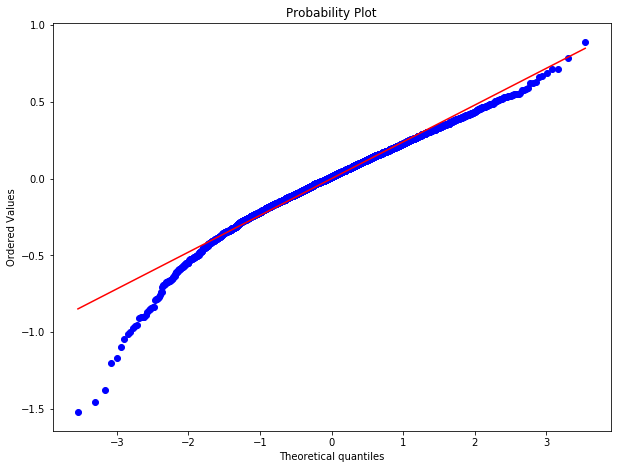

In [1294]:
from scipy import stats
import pylab

stats.probplot(lm1.resid, dist="norm", plot=pylab )
pylab.show()

In [1295]:
# predicting limit for the new applicants

np.exp(lm1.predict(train))

1840    13.039680
2115    13.221388
4437    12.330415
1146    11.567443
2486    12.254745
          ...    
4426    12.551645
466     16.808798
3092    11.658638
3772    15.294456
860     13.254485
Length: 3500, dtype: float64

# BUSINESS SOLUTION:

### Hence, from Linear Regression model we got to know that the factors driving the total spend are: <br>

- **card_2** : Primary credit card - **Visa**
- **card_3** : Primary credit card - **Mastercard**
- **card_4** : Primary credit card - **Discover**
- **card_5** : Primary credit card - **Other**
- **card2_2** : Secondary credit card - **Platinum**
- **card2_3** : Secondary credit card - **Gold**
- **card2_4** : Secondary credit card - **Discover**
- **card2_5** : Secondary credit card - **Other**
- **card2tenure_4** : Years held secondary credit card - **4**
- **card2benefit_3** : Benefit program for secondary credit card - **Airline miles**
- **inccat_2** : Income category in thousands - $25-$49
- **inccat_3** : Income category in thousands - $50 - $74
- **inccat_4** : Income category in thousands - $75 - $124
- **ownvcr_1** : Owns VCR - **Yes**
- **owncd_1** : Owns stereo/CD player - **Yes**
- **income** : Household income in thousands
- **carown_1** : Primary vehicle lease/own - **Own**
- **bfast_2** : Preferred breakfast - **Oatmeal**
- **reason_2** : **Primary reason for being a customer here - Convenience**
- **reason_4** : Primary reason for being a customer here - **other**
- **birthmonth_February** : Birth month - **February**
- **gender_1** : gender - **Female**
- **employ_43** : Years with current employer - **43**
- **address_32** : Years at current address - **32**

_____________________________________________________________________________________________________________________